In [1]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145897&authkey=AAQKZ0FhjjfkhcM"

--2019-05-23 10:20:46--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145897&authkey=AAQKZ0FhjjfkhcM
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mmrwyw.am.files.1drv.com/y4mUQhyWtWo6Z2zhE9JW5tBbuPCIyNx2bifYS2mC8zOYQX2I5v2c5tO-m0fvu1UlRKxRucfrzqIy6FZRB5kyNYulDGepOkFdIPC4cTfsmiIbQLgt7MA_tO_godpIYHXk7AnPEkQa_WSV3LEAtAfXWUap5CVM-iPcEdK5HkEbvCLbNMrEPiPwIp5ZD4p2PFa4d2rN4dy9qB1OXvja7VoSBDWrA/50k_All_Parking_Spaces.zip?download&psid=1 [following]
--2019-05-23 10:20:47--  https://mmrwyw.am.files.1drv.com/y4mUQhyWtWo6Z2zhE9JW5tBbuPCIyNx2bifYS2mC8zOYQX2I5v2c5tO-m0fvu1UlRKxRucfrzqIy6FZRB5kyNYulDGepOkFdIPC4cTfsmiIbQLgt7MA_tO_godpIYHXk7AnPEkQa_WSV3LEAtAfXWUap5CVM-iPcEdK5HkEbvCLbNMrEPiPwIp5ZD4p2PFa4d2rN4dy9qB1OXvja7VoSBDWrA/50k_All_Parking_Spaces.zip?download&psid=1
Resolving mmrwyw.am.files.1drv.

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45897&authkey=AAQKZ0FhjjfkhcM"

In [3]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import os


data_dir = './50k_All_Parking_Spaces'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 16)        432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
__________

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

Found 43448 images belonging to 2 classes.
Found 9999 images belonging to 2 classes.


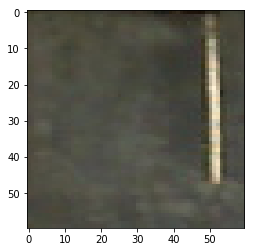

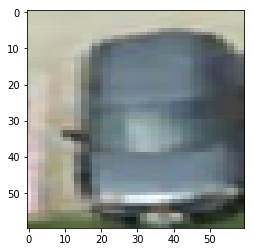

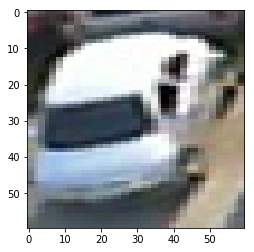

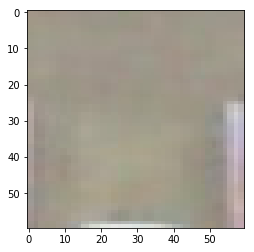

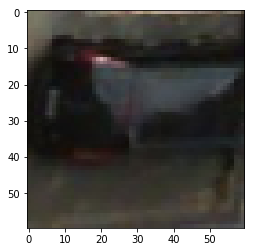

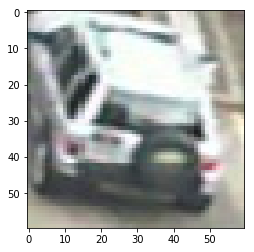

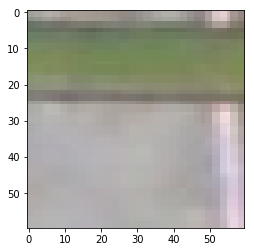

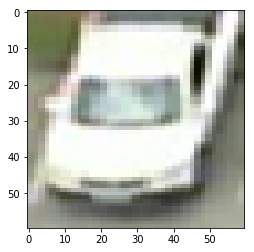

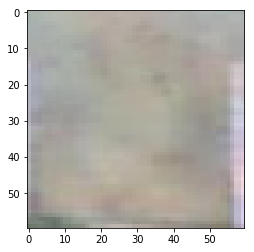

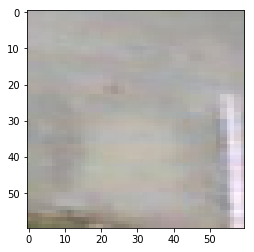

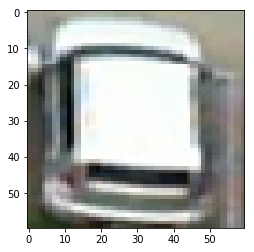

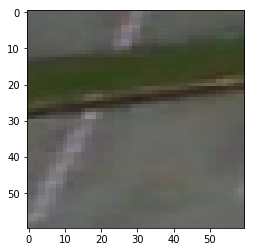

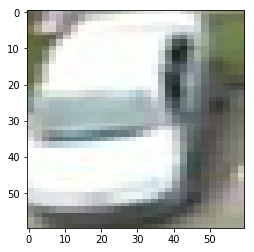

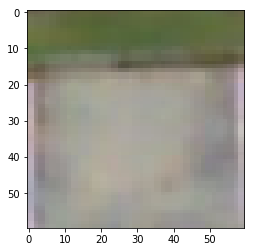

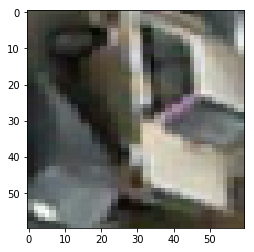

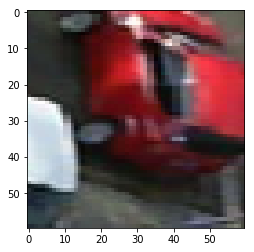

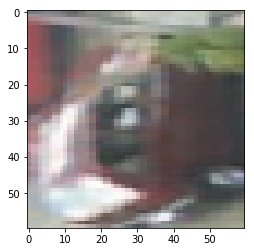

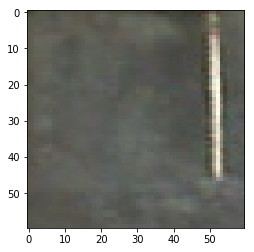

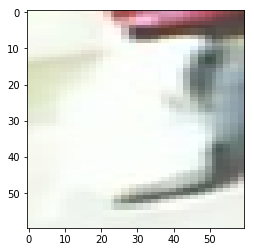

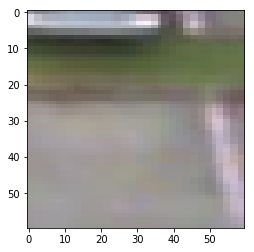

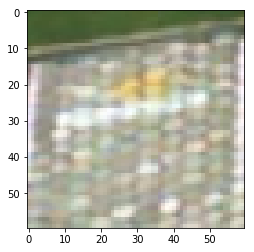

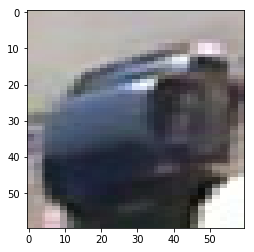

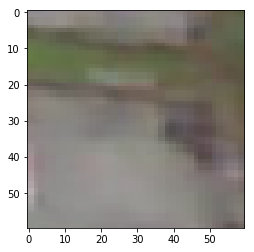

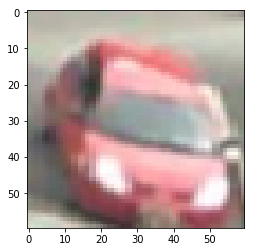

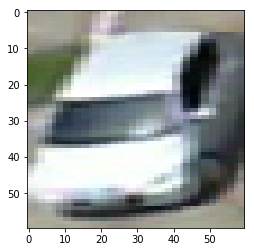

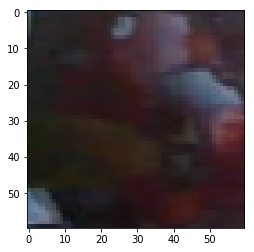

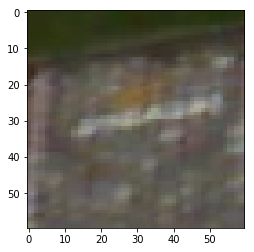

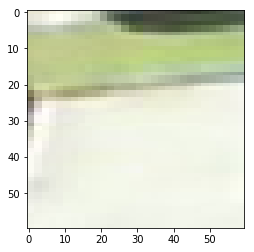

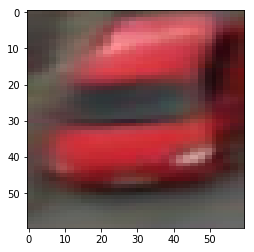

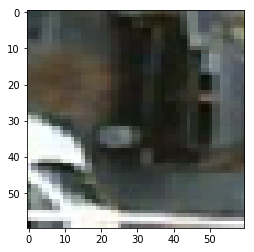

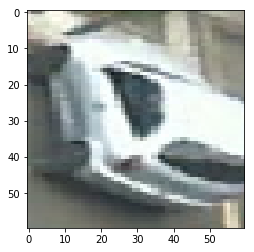

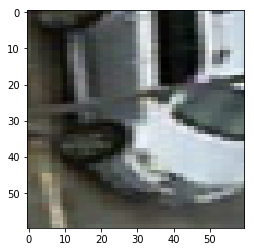

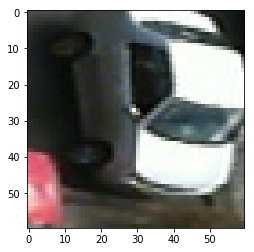

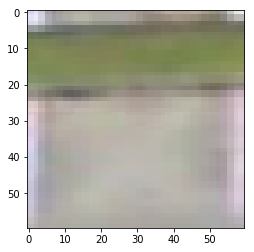

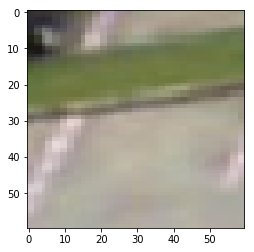

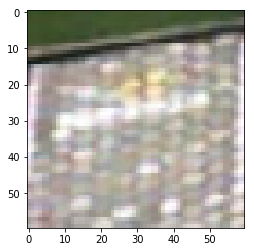

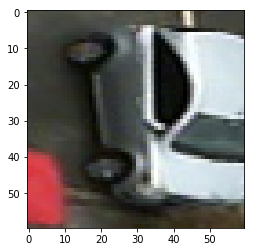

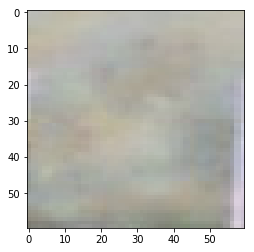

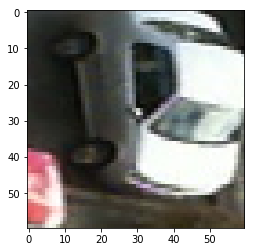

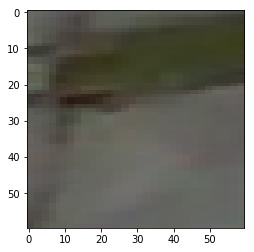

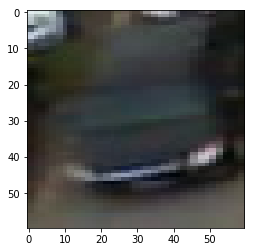

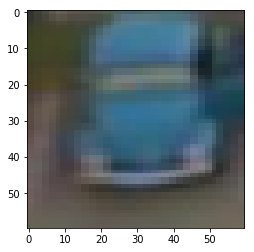

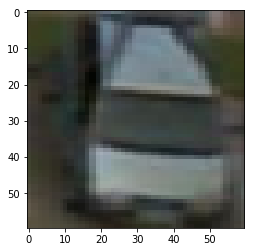

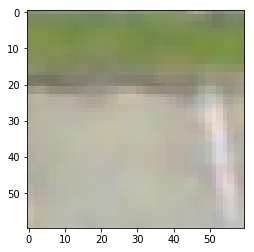

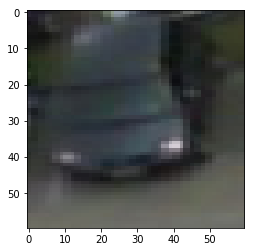

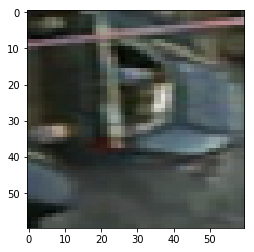

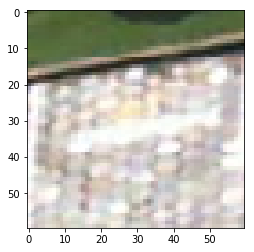

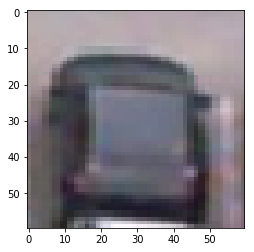

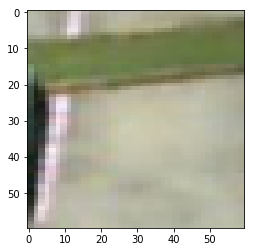

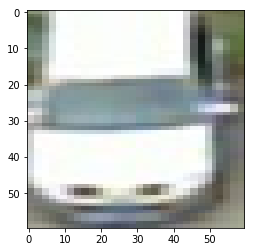

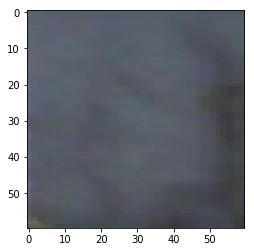

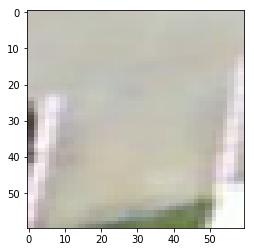

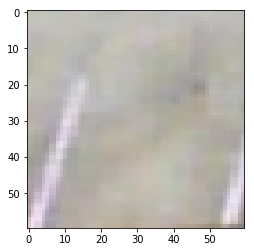

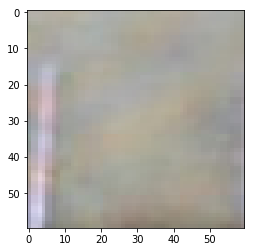

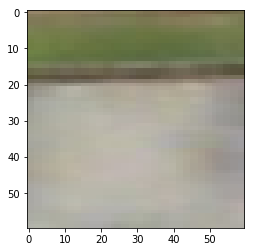

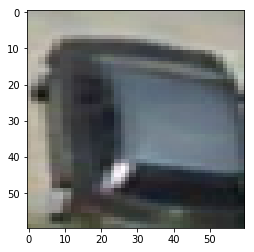

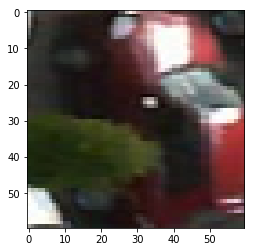

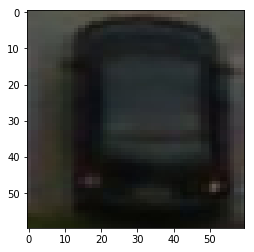

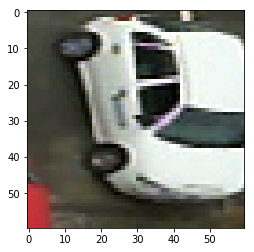

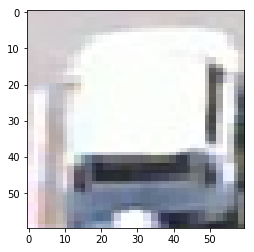

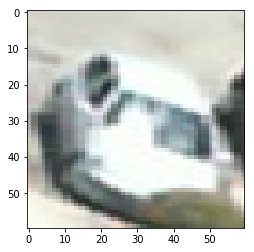

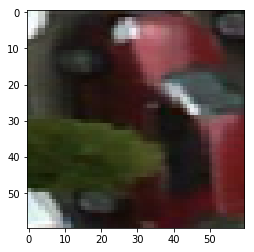

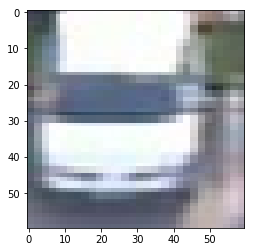

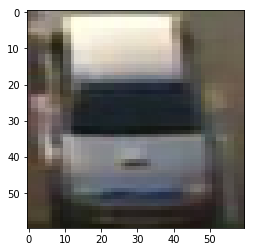

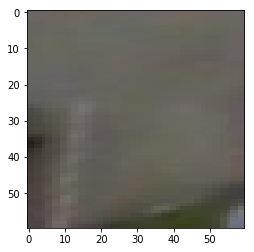

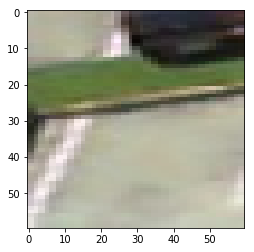

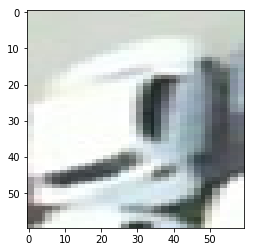

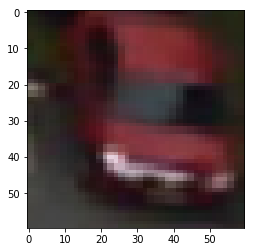

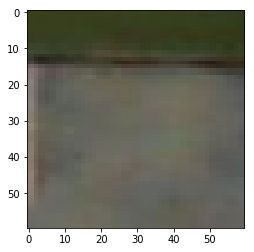

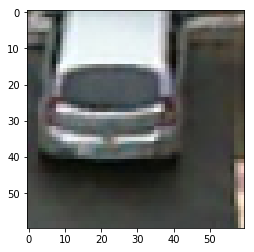

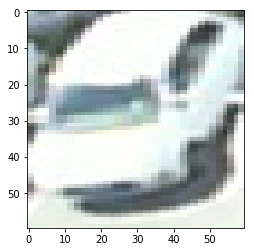

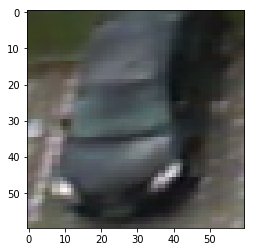

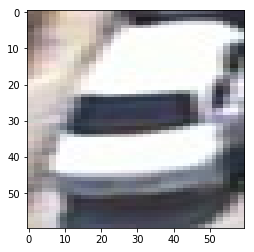

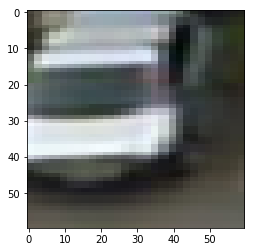

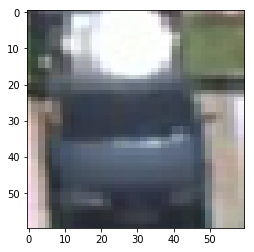

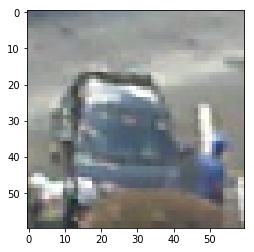

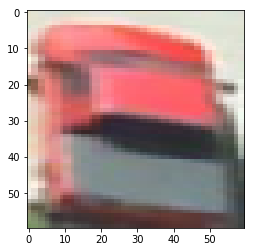

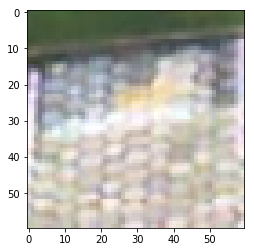

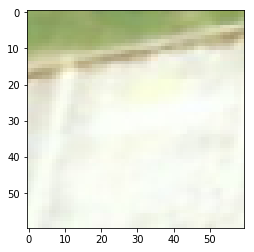

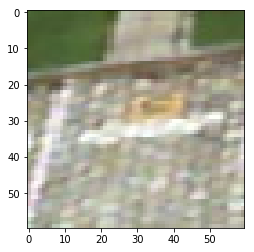

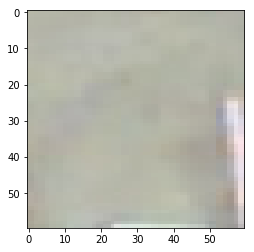

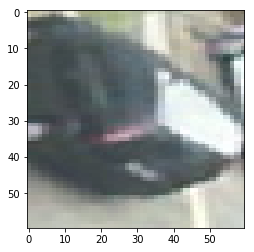

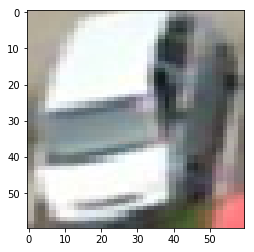

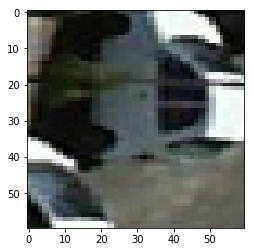

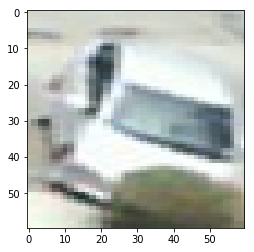

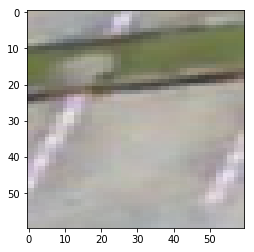

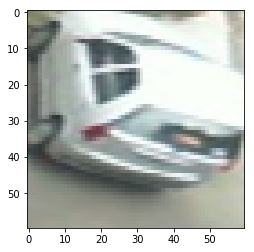

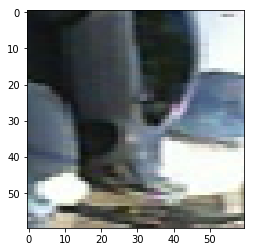

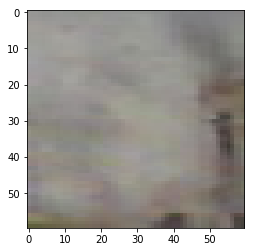

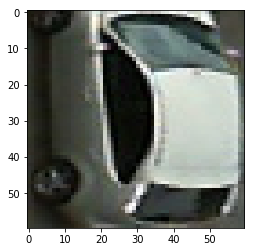

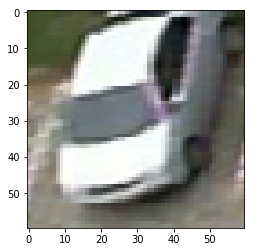

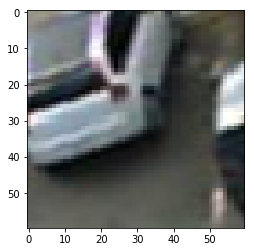

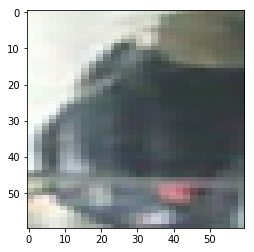

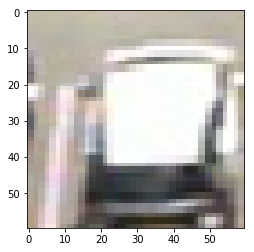

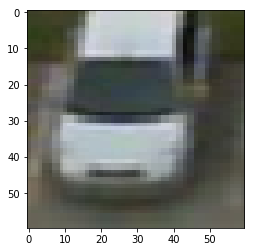

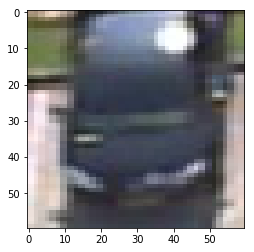

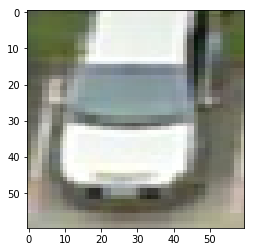

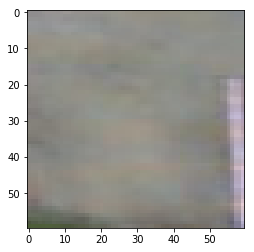

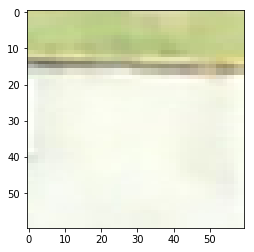

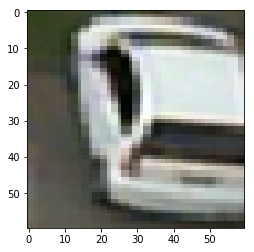

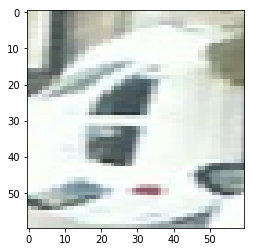

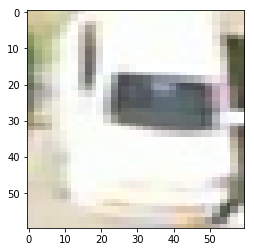

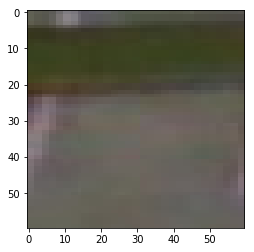

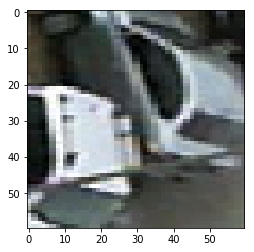

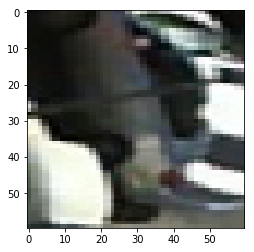

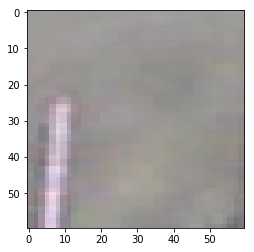

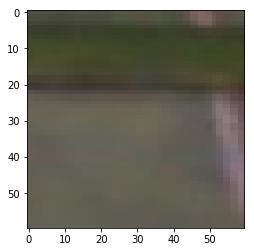

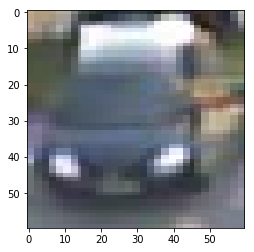

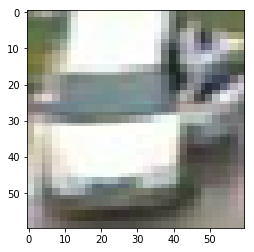

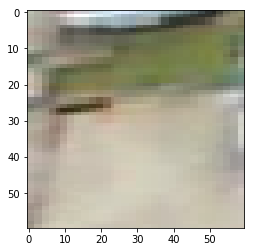

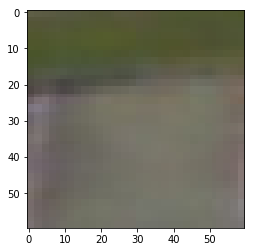

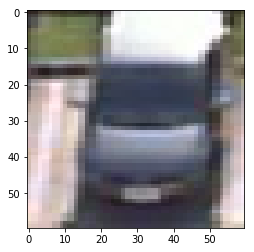

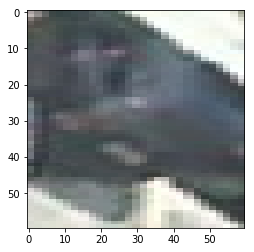

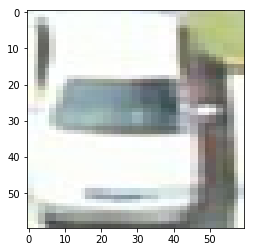

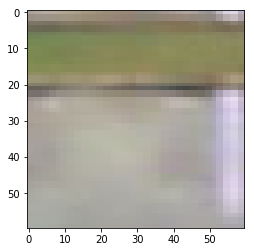

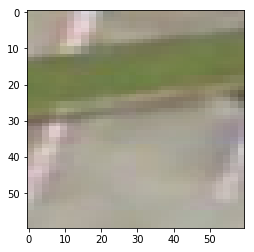

In [5]:
x_batch, y_batch = next(train_generator)

for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [6]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=313, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=79, 
                              callbacks=[es]
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
313/313 [==============================] - 46s 149ms/step - loss: 0.0276 - acc: 0.9906 - val_loss: 0.5048 - val_acc: 0.8797
Epoch 2/100
313/313 [==============================] - 43s 137ms/step - loss: 0.0061 - acc: 0.9984 - val_loss: 0.4458 - val_acc: 0.8837
Epoch 3/100
313/313 [==============================] - 42s 133ms/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.4319 - val_acc: 0.8970
Epoch 4/100
313/313 [==============================] - 43s 136ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.5552 - val_acc: 0.8909
Epoch 5/100
313/313 [==============================] - 41s 132ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.5045 - val_acc: 0.8985
Epoch 6/100
313/313 [==============================] - 44s 140ms/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.4603 - val_acc: 0.9043
Epoch 7/100
313/313 [==============================] - 43s 136ms/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.4699 - val_acc: 0.9071


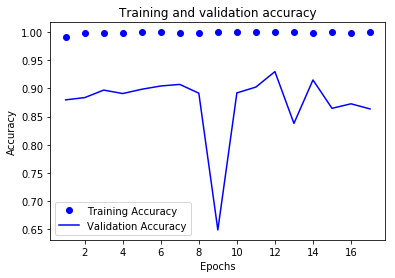

In [7]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [8]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-23 10:33:37--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mUYSY-OzxPWppgE1F5a2UaitMw9lPPgqxpQrByLVnY-IPJK7eYlugtgGLbDsmt0wviN-qG-ERRZefuBDJ59oeTHxcYT6fk0kY8Vnlc31xsaHsZzklCoCjDIv4kfuxst6C_4kvKHQQZvGoyTqVZ193LbUmJBUrmplmM8c2Fy57t-ymz2whY6ndBQ6Grt6ei-aTXxN-P-o707rtAU4YVtYCqw/CNR_TEST.zip?download&psid=1 [following]
--2019-05-23 10:33:38--  https://mwrg1q.am.files.1drv.com/y4mUYSY-OzxPWppgE1F5a2UaitMw9lPPgqxpQrByLVnY-IPJK7eYlugtgGLbDsmt0wviN-qG-ERRZefuBDJ59oeTHxcYT6fk0kY8Vnlc31xsaHsZzklCoCjDIv4kfuxst6C_4kvKHQQZvGoyTqVZ193LbUmJBUrmplmM8c2Fy57t-ymz2whY6ndBQ6Grt6ei-aTXxN-P-o707rtAU4YVtYCqw/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [10]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )



model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.43555667623877525, 0.9187500029802322]

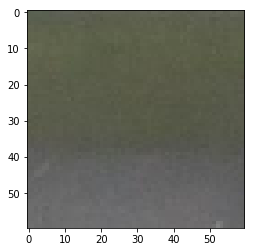

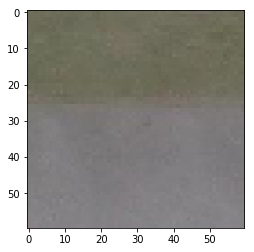

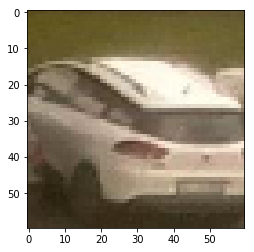

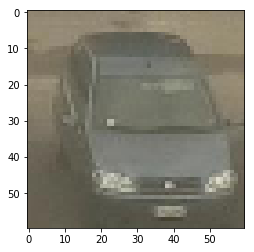

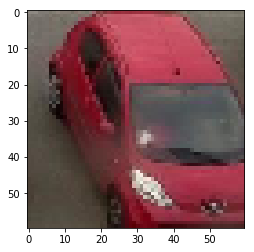

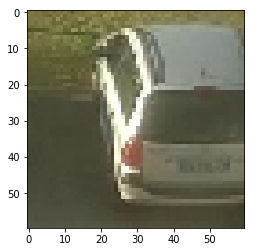

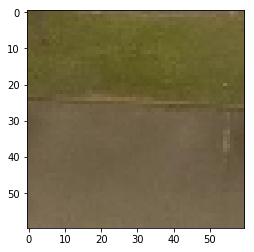

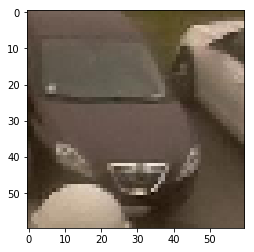

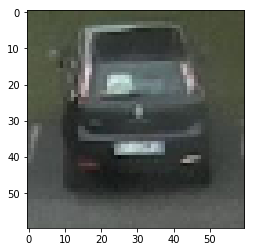

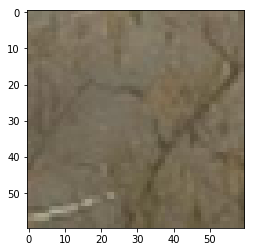

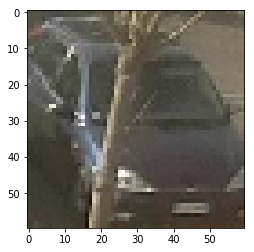

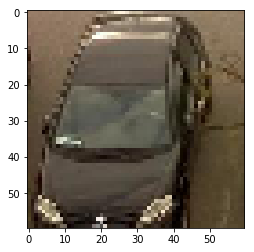

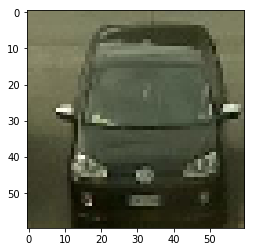

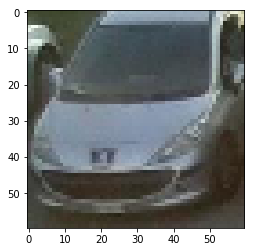

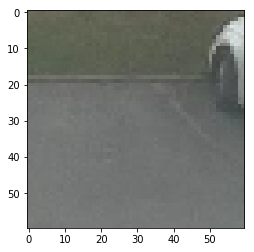

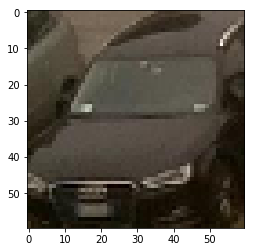

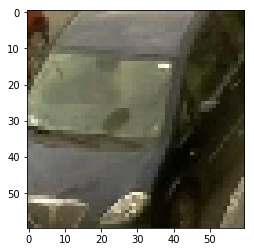

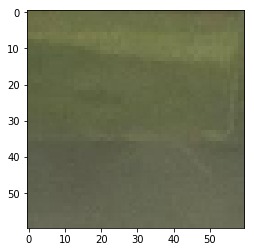

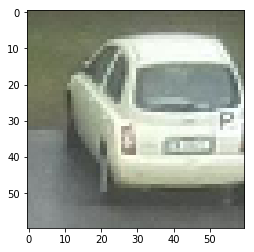

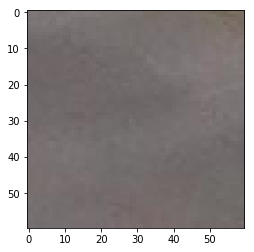

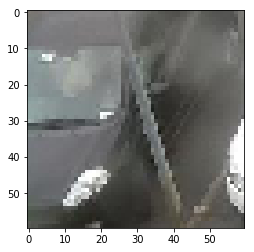

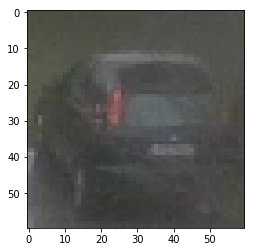

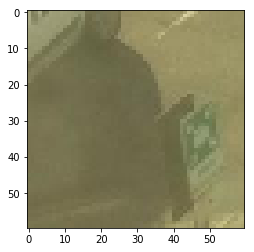

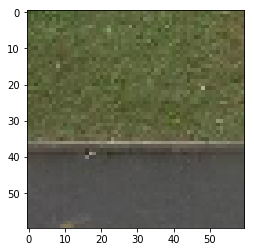

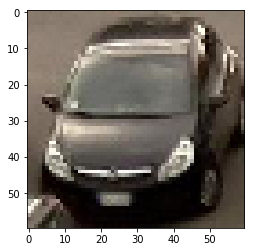

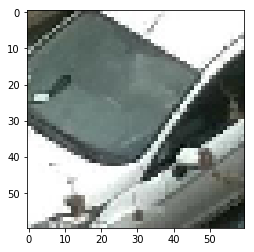

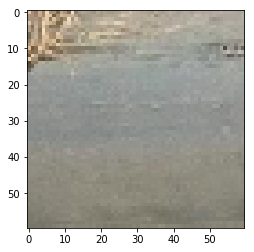

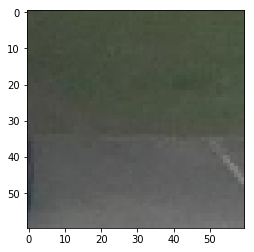

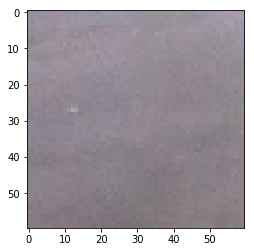

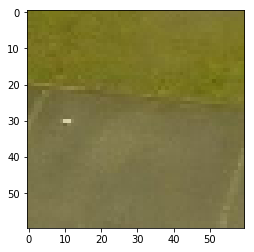

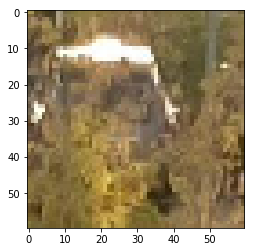

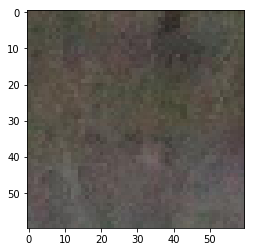

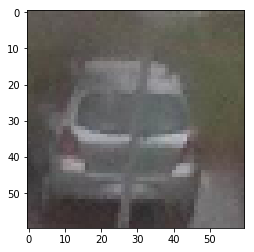

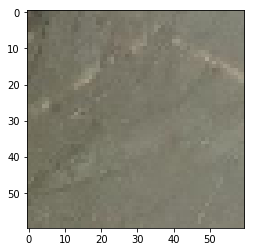

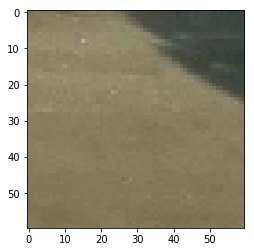

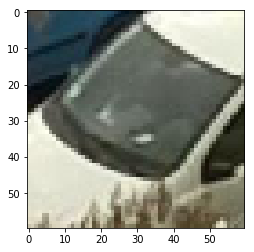

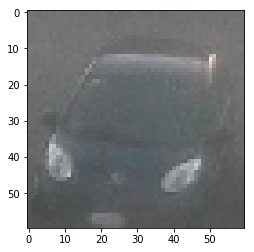

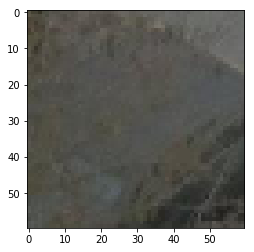

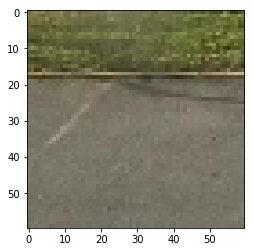

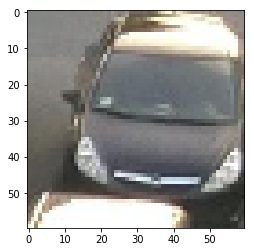

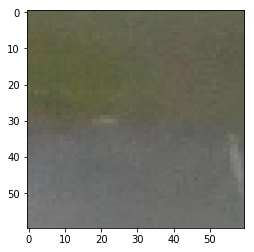

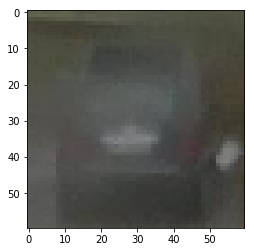

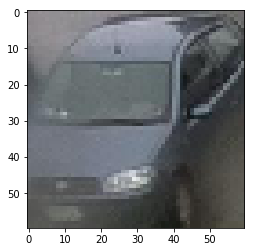

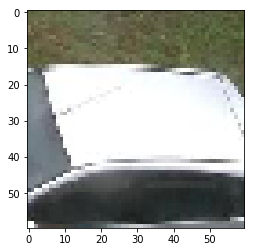

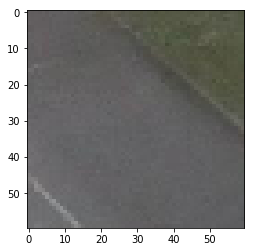

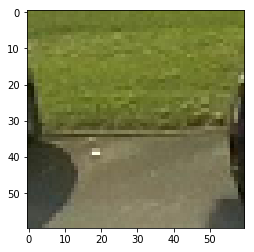

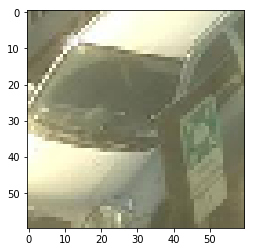

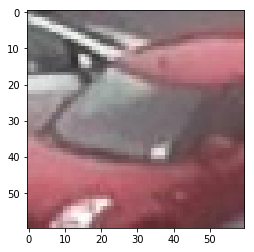

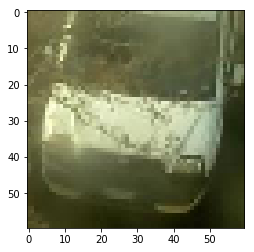

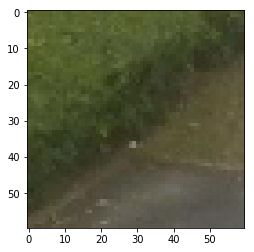

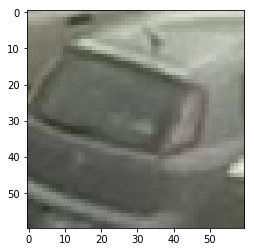

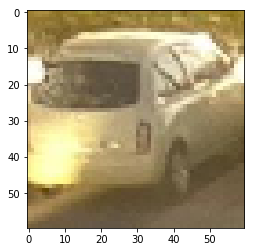

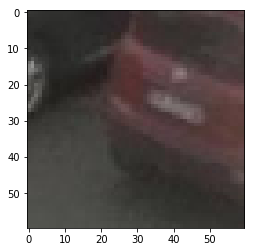

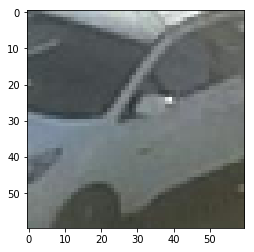

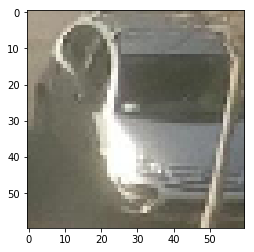

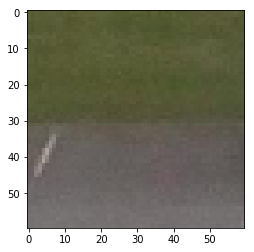

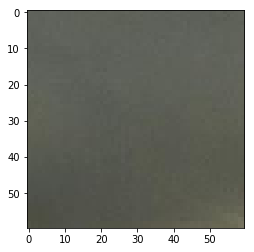

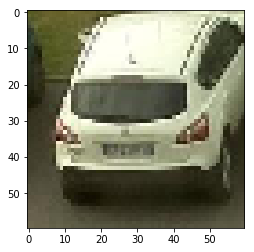

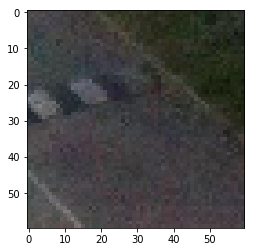

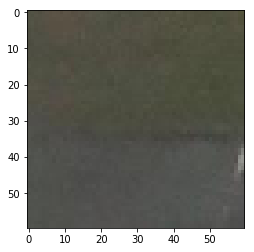

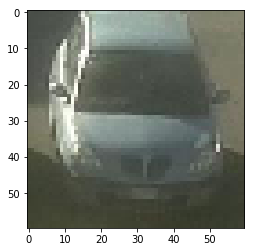

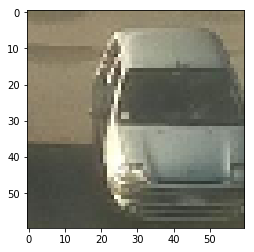

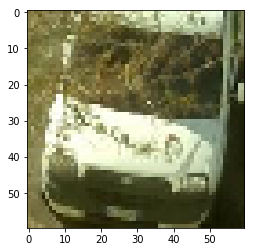

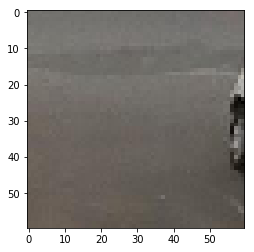

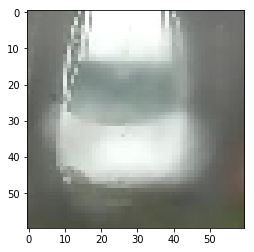

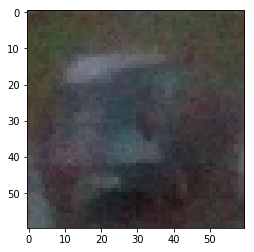

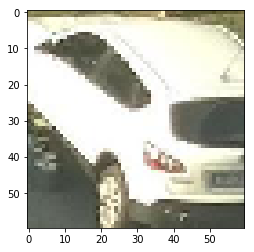

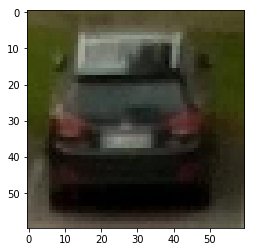

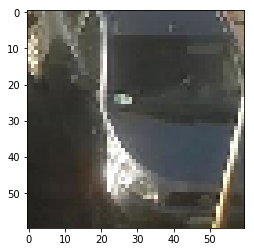

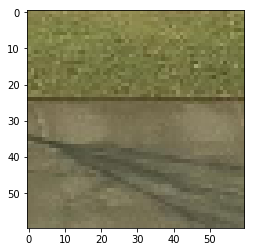

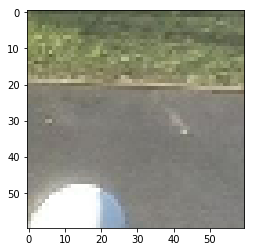

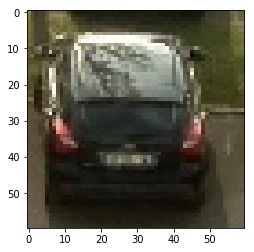

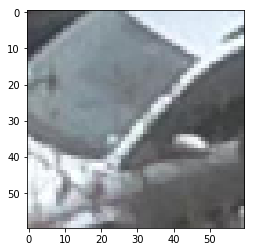

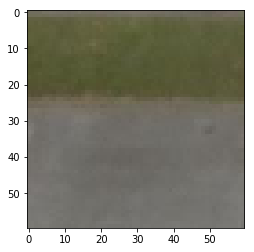

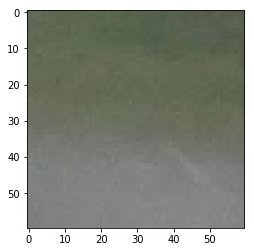

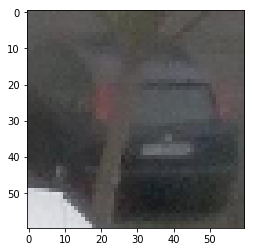

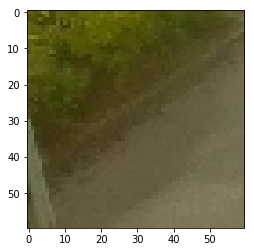

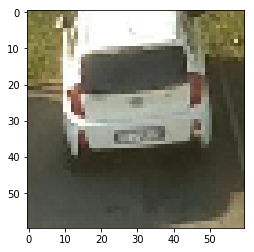

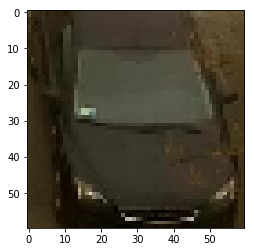

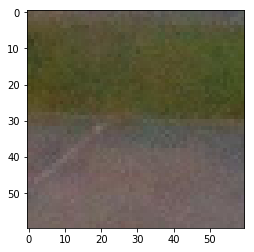

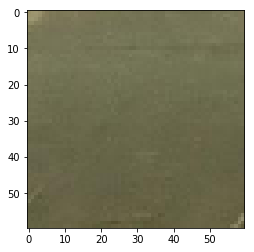

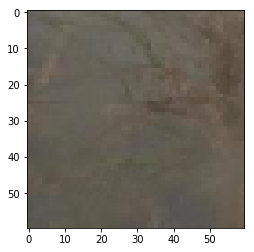

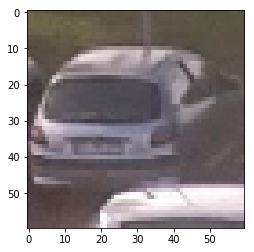

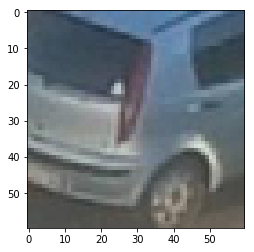

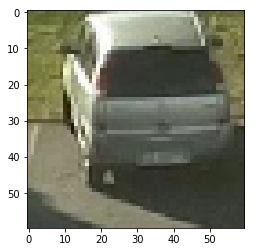

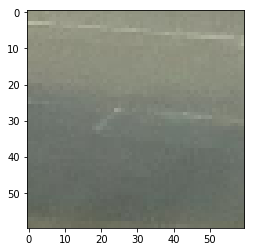

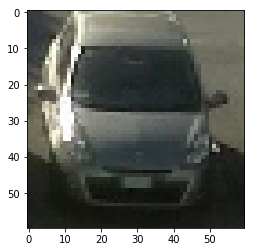

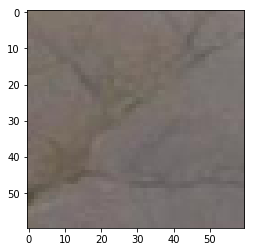

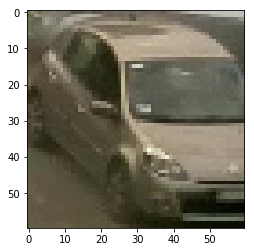

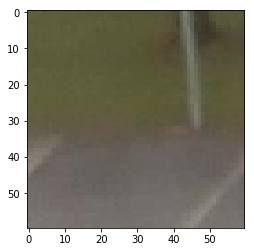

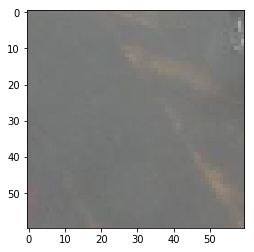

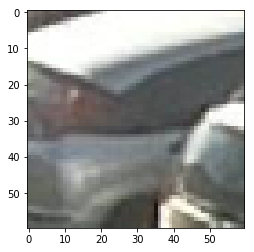

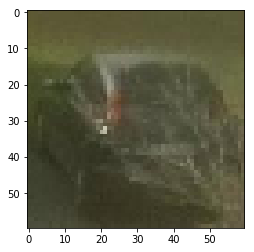

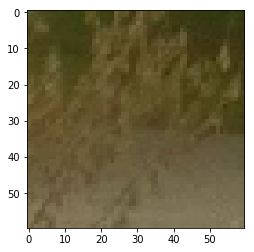

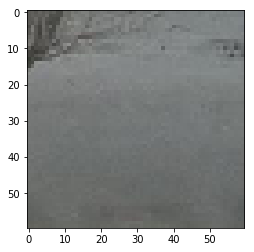

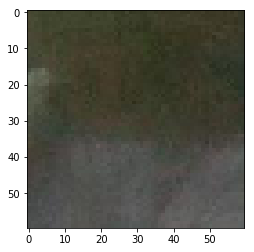

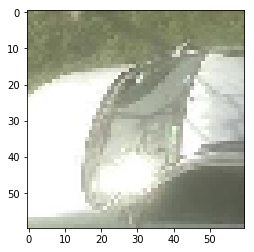

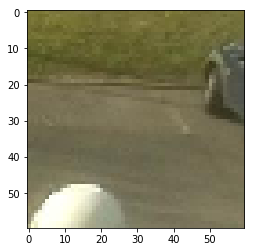

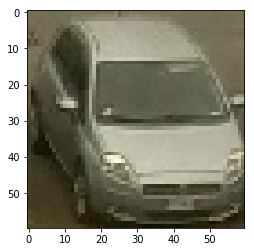

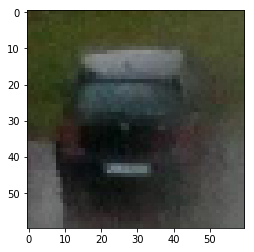

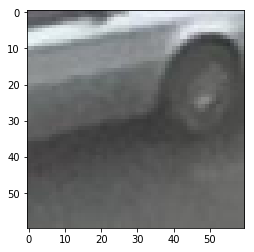

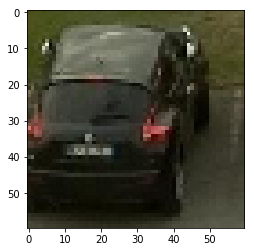

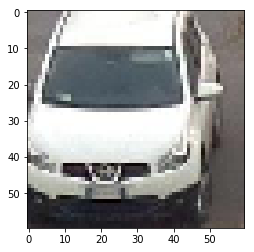

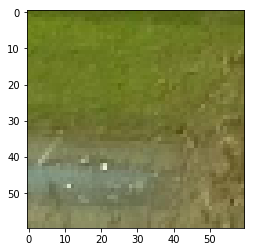

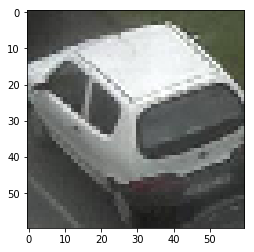

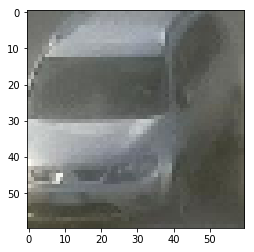

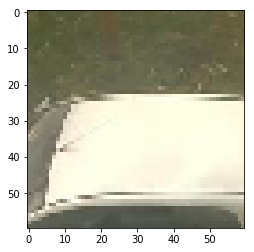

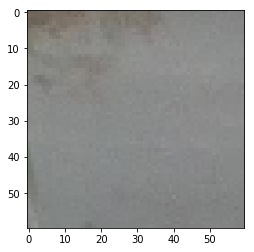

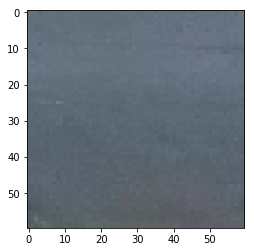

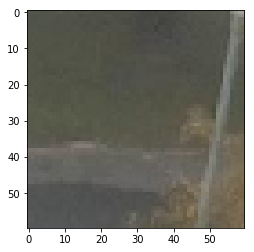

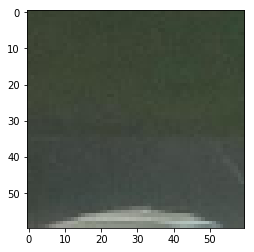

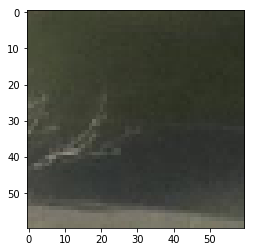

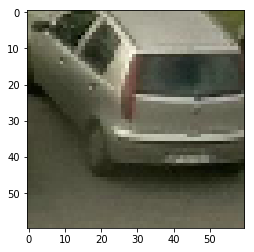

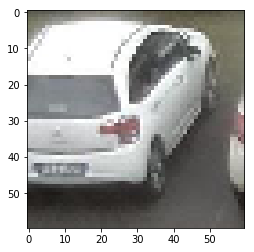

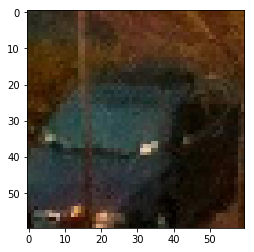

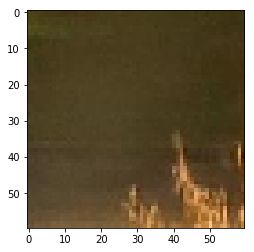

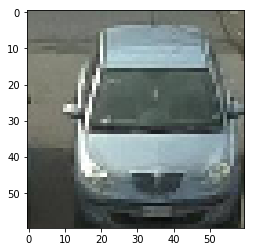

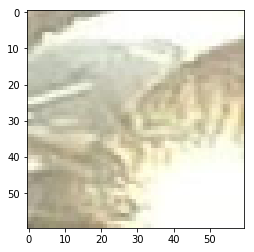

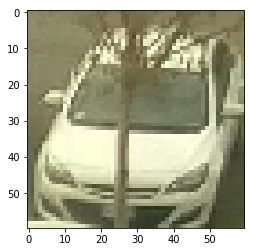

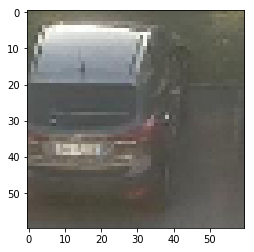

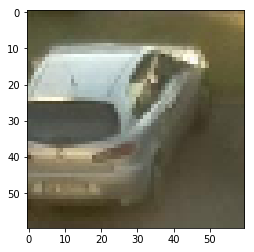

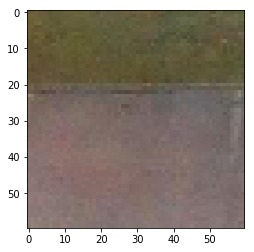

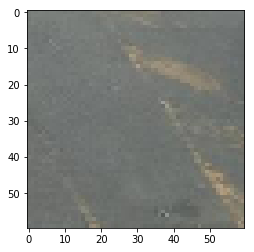

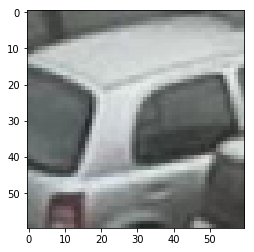

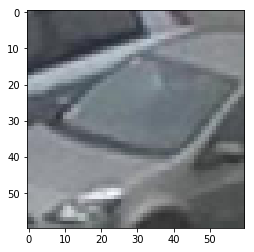

In [11]:
x_batch, y_batch = next(test_generator)

for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [12]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


result = model.predict_generator(test_generator,20)
print(result[1])

[6.3985586e-05]


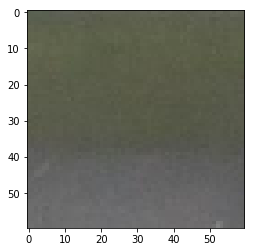

[0.04439032]
0.0


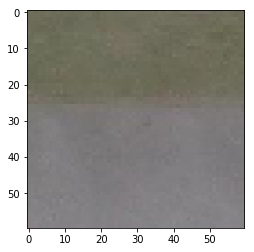

[6.3985586e-05]
0.0


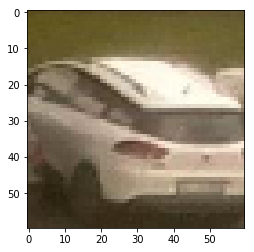

[1.8179417e-06]
1.0


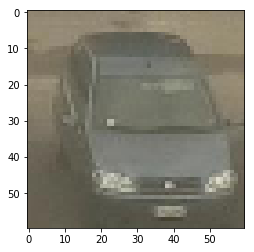

[1.]
1.0


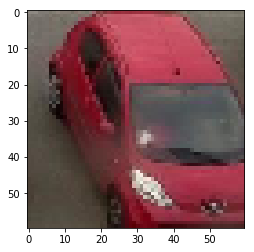

[1.]
1.0


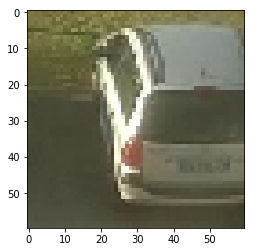

[0.00016117]
1.0


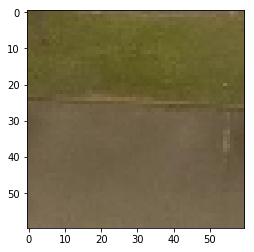

[3.1590462e-06]
0.0


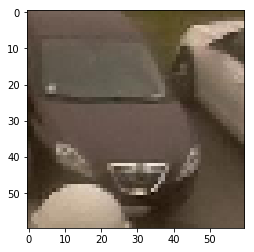

[0.00016123]
1.0


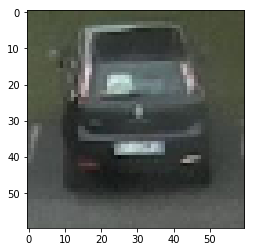

[1.]
1.0


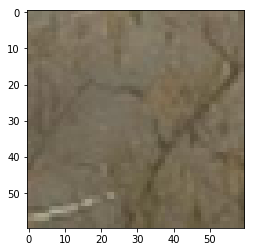

[0.5012979]
0.0


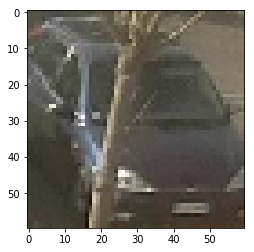

[3.1888485e-06]
1.0


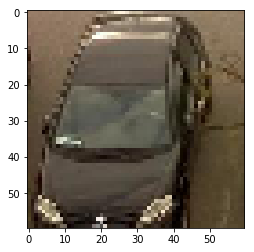

[2.2053719e-06]
1.0


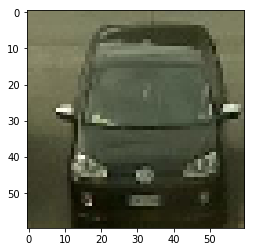

[2.0861626e-07]
1.0


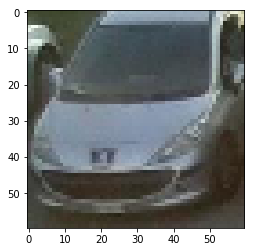

[1.1593103e-05]
1.0


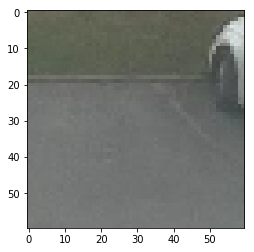

[1.8924475e-05]
0.0


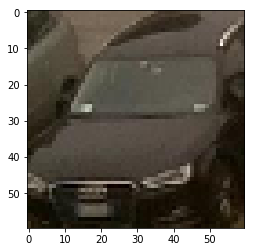

[0.9314101]
1.0


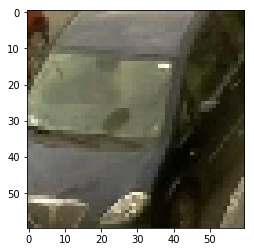

[0.01221678]
1.0


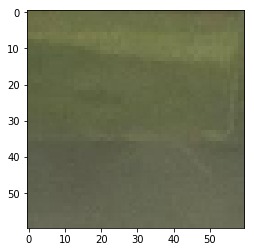

[0.0004493]
0.0


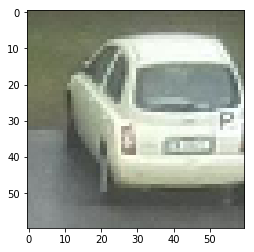

[8.672476e-06]
1.0


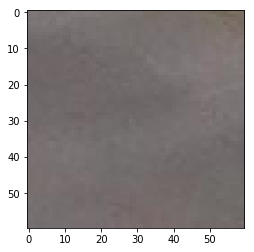

[0.9999802]
0.0


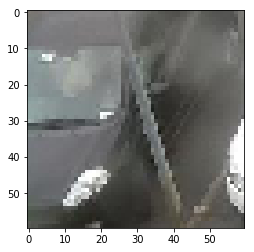

[0.00558621]
1.0


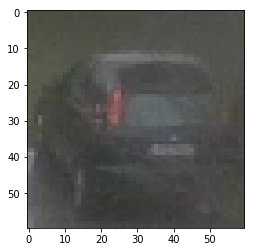

[1.]
1.0


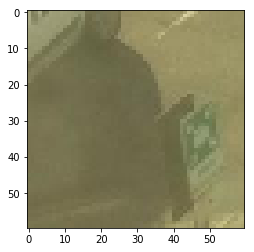

[0.00019765]
0.0


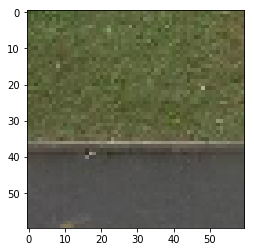

[7.748604e-07]
0.0


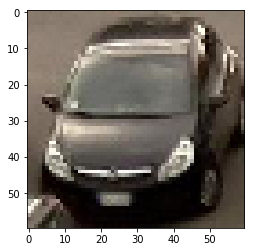

[7.069111e-05]
1.0


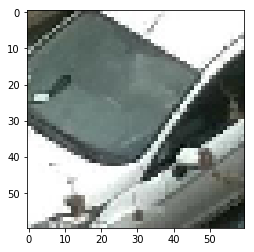

[0.99999994]
1.0


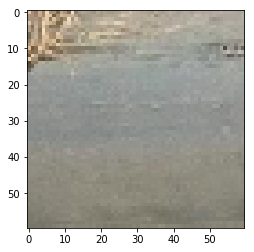

[0.2629725]
0.0


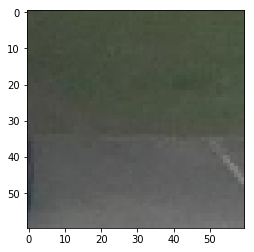

[1.4275312e-05]
0.0


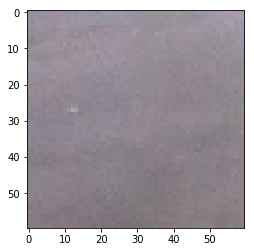

[0.7564428]
0.0


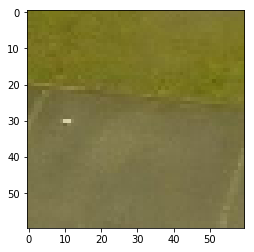

[1.]
0.0


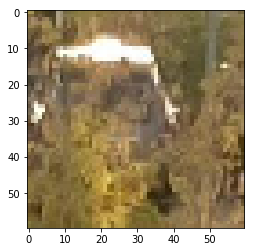

[2.9802322e-07]
1.0


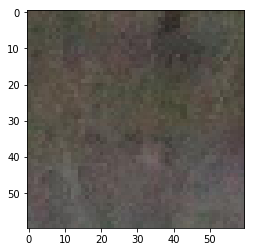

[0.01127702]
0.0


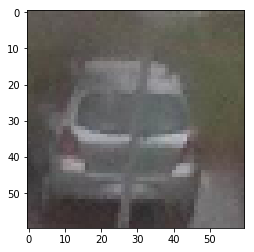

[0.00611195]
1.0


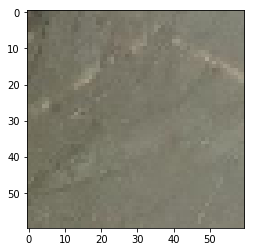

[1.]
0.0


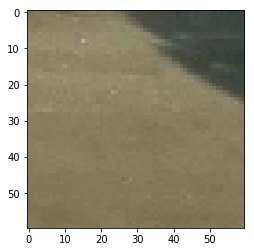

[0.94631726]
0.0


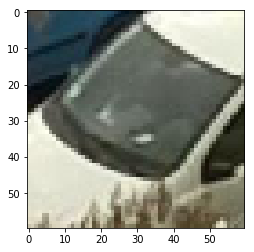

[1.]
1.0


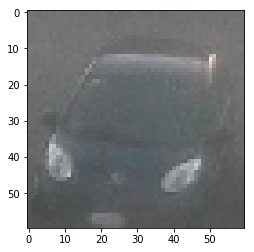

[0.00028139]
1.0


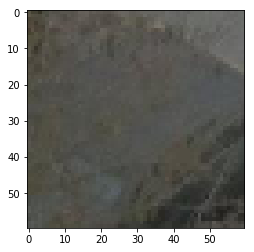

[1.9401312e-05]
1.0


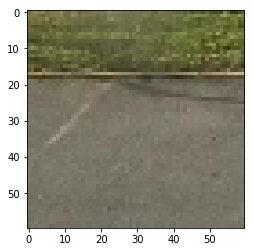

[1.]
0.0


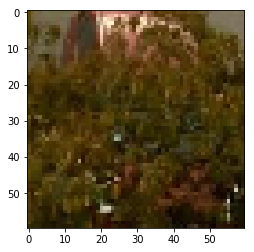

[3.5762787e-07]
1.0


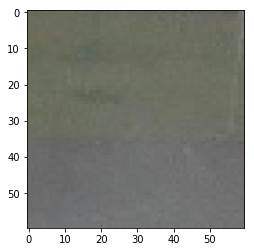

[2.9802322e-08]
0.0


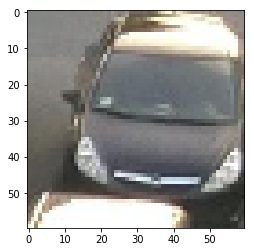

[1.]
1.0


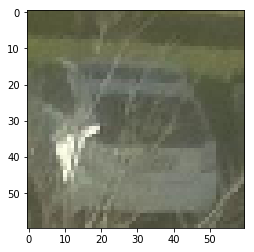

[3.1888485e-06]
1.0


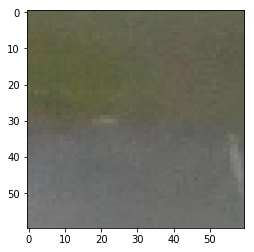

[1.]
0.0


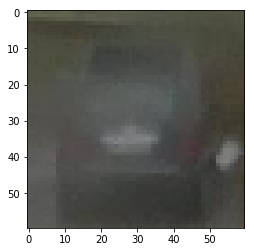

[1.7881393e-06]
1.0


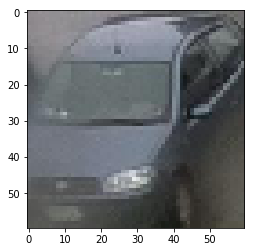

[4.887581e-06]
1.0


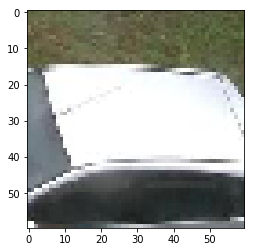

[0.00013086]
1.0


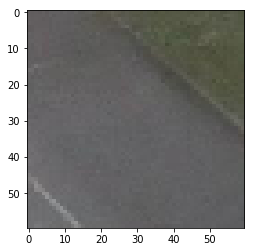

[5.438924e-05]
0.0


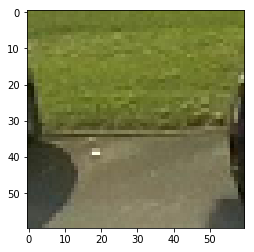

[1.]
0.0


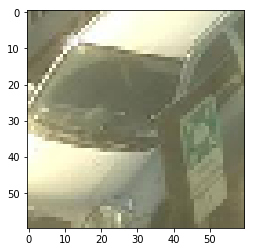

[3.5703182e-05]
1.0


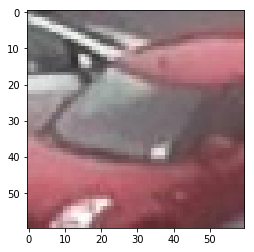

[0.9999959]
1.0


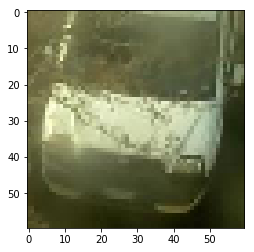

[0.17975539]
1.0


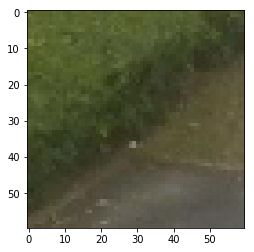

[0.05082163]
0.0


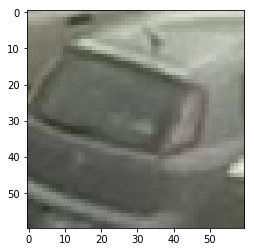

[0.9999994]
1.0


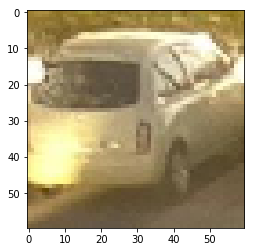

[2.476573e-05]
1.0


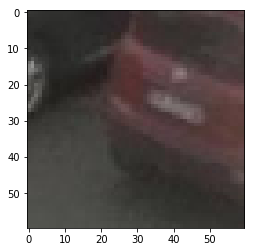

[1.]
1.0


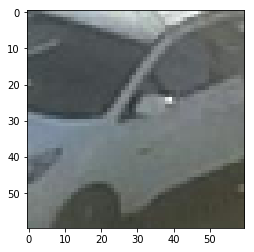

[0.21954417]
1.0


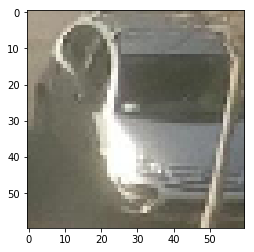

[0.00035113]
1.0


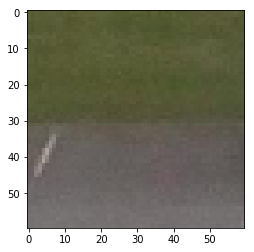

[0.06952637]
0.0


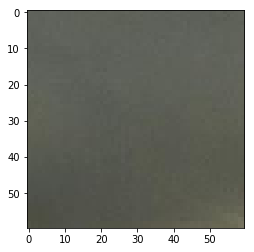

[0.01450655]
0.0


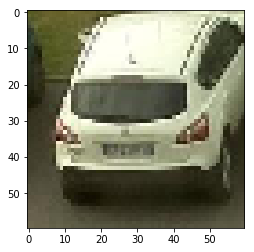

[0.00030655]
1.0


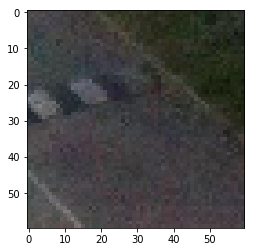

[1.]
0.0


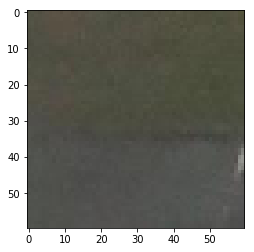

[0.9999835]
0.0


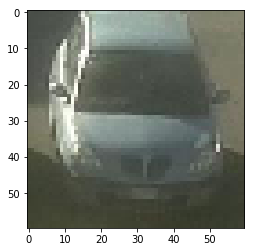

[0.9999497]
1.0


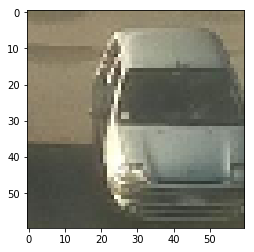

[1.]
1.0


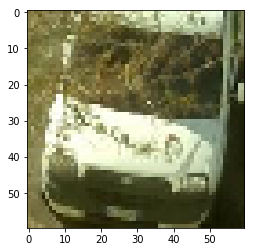

[1.]
1.0


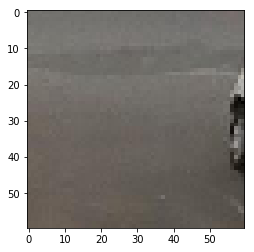

[3.3825636e-05]
0.0


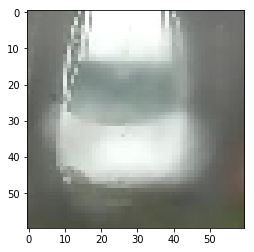

[0.99999714]
1.0


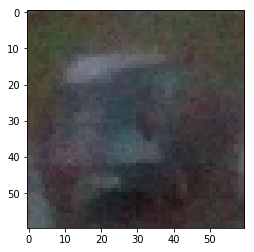

[1.]
1.0


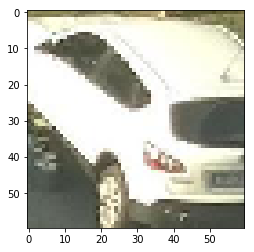

[0.00019312]
1.0


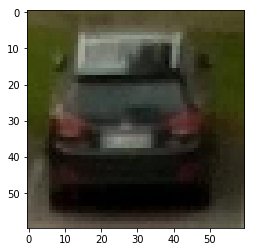

[0.00982141]
1.0


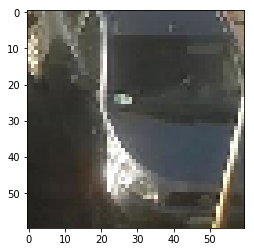

[1.]
1.0


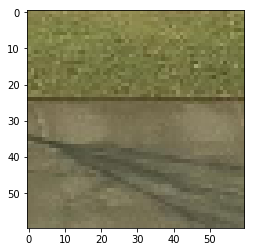

[5.2452087e-06]
0.0


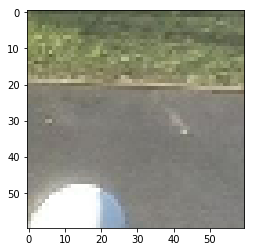

[1.]
0.0


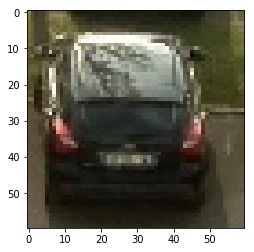

[0.62634856]
1.0


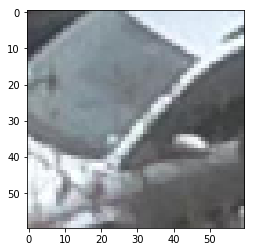

[1.]
1.0


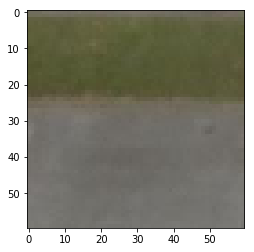

[0.99959683]
0.0


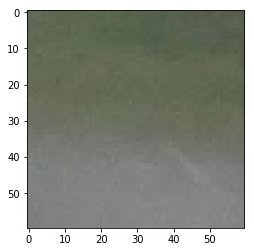

[1.]
0.0


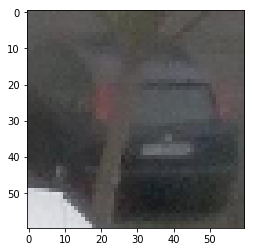

[0.]
1.0


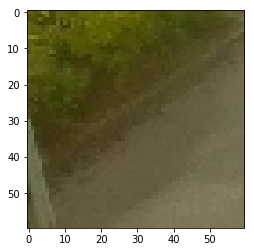

[4.4375658e-05]
0.0


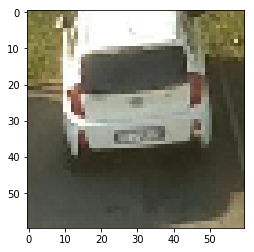

[2.6166439e-05]
1.0


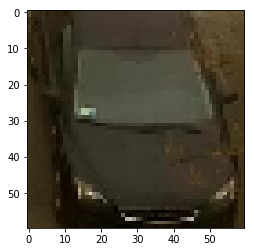

[0.7278969]
1.0


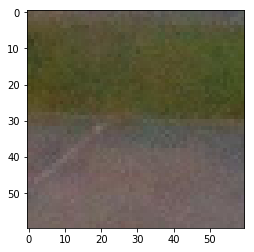

[0.98990613]
0.0


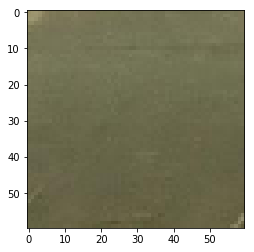

[0.9999931]
0.0


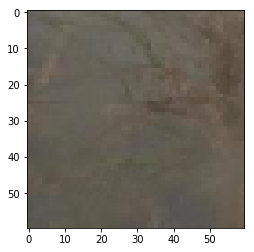

[1.]
0.0


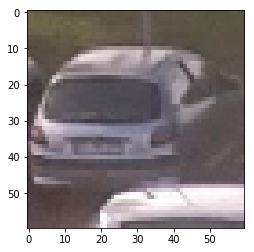

[4.7683716e-07]
1.0


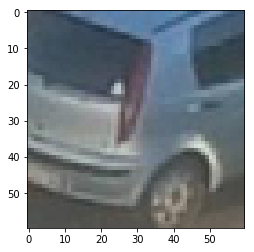

[0.9999989]
1.0


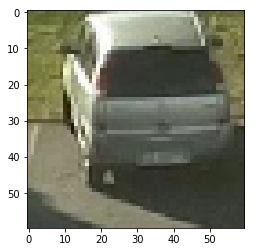

[7.688999e-06]
1.0


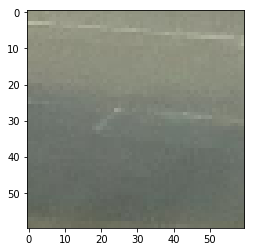

[4.3213367e-06]
0.0


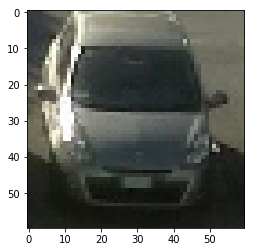

[0.00024784]
1.0


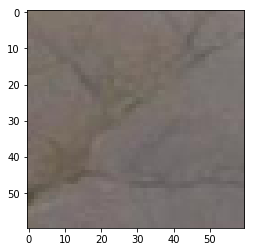

[1.4483929e-05]
0.0


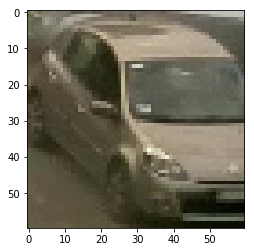

[4.7683716e-07]
1.0


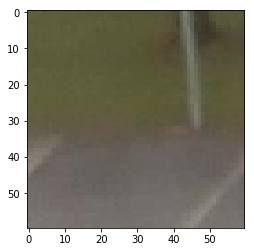

[1.8626451e-05]
0.0


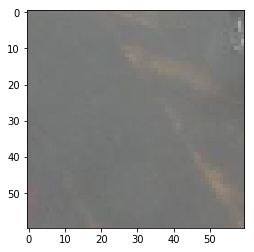

[0.00906253]
0.0


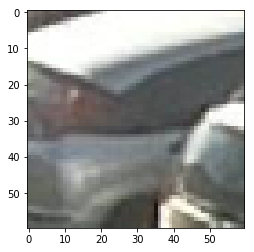

[0.00423729]
1.0


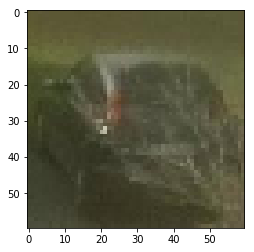

[0.01488581]
1.0


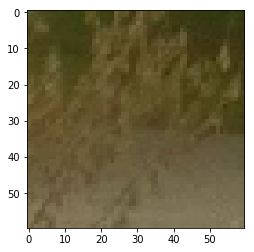

[1.]
0.0


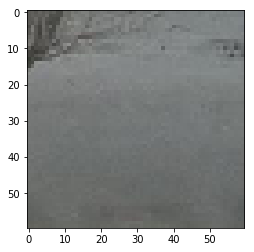

[1.66893e-06]
0.0


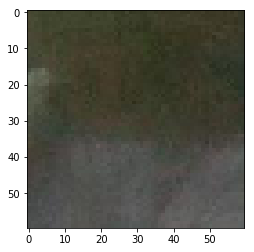

[1.8775463e-06]
0.0


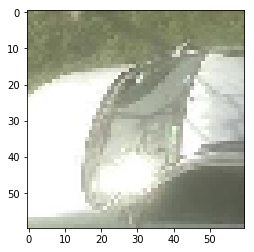

[0.00192964]
1.0


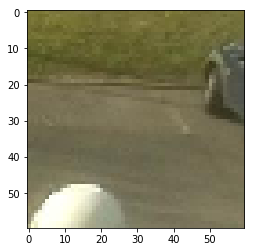

[0.99978113]
0.0


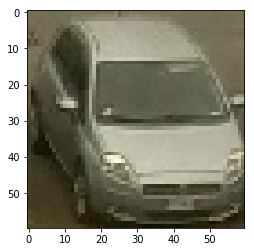

[4.4703484e-05]
1.0


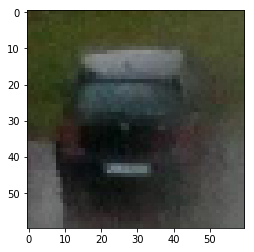

[5.9604645e-08]
1.0


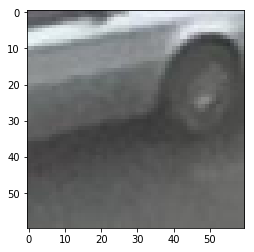

[3.311038e-05]
0.0


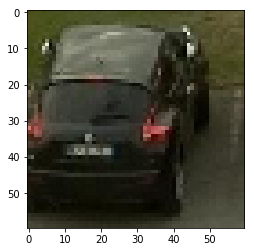

[1.]
1.0


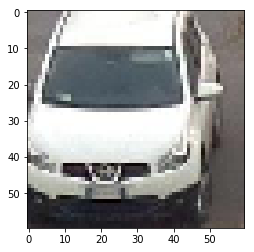

[0.47133118]
1.0


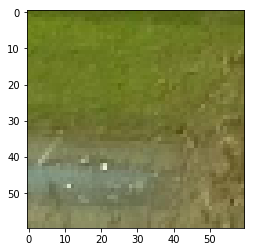

[0.9999987]
0.0


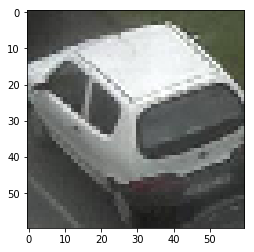

[1.]
1.0


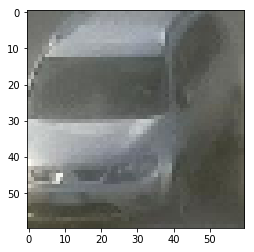

[2.899766e-05]
1.0


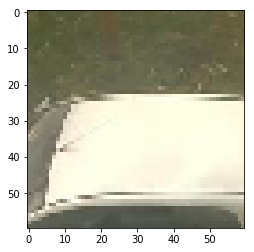

[1.]
1.0


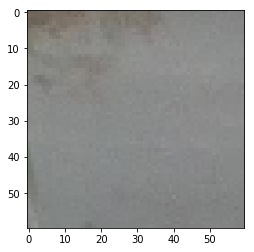

[2.297759e-05]
0.0


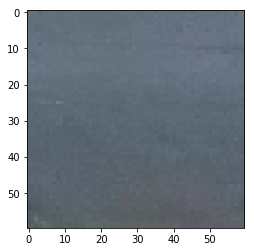

[0.9999998]
0.0


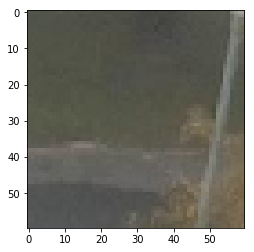

[1.]
0.0


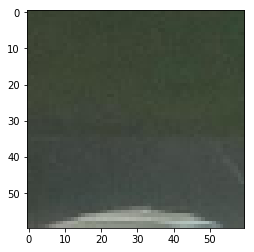

[1.7881393e-07]
0.0


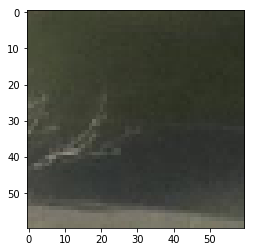

[3.33786e-06]
0.0


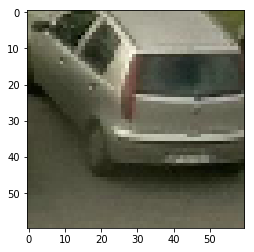

[0.85094106]
1.0


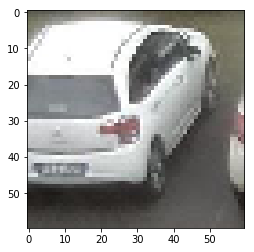

[0.9911723]
1.0


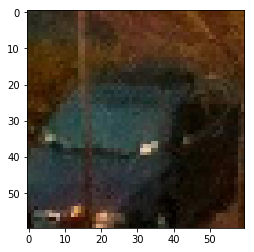

[2.9802322e-08]
1.0


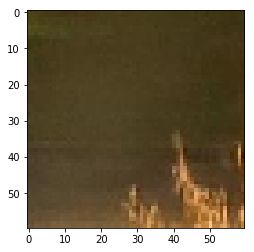

[1.]
0.0


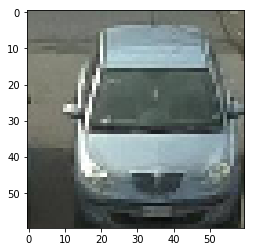

[0.9999975]
1.0


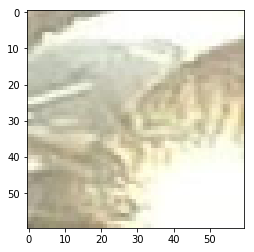

[0.0006828]
1.0


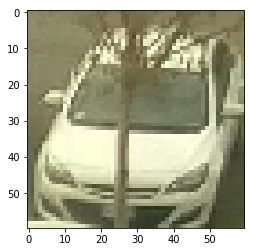

[0.9998236]
1.0


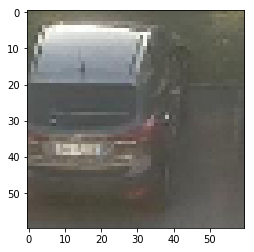

[0.00010186]
1.0


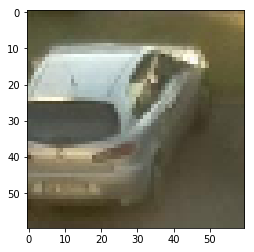

[0.0002526]
1.0


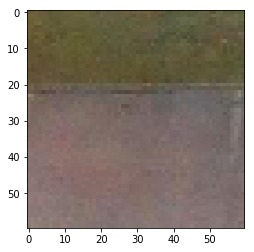

[1.]
0.0


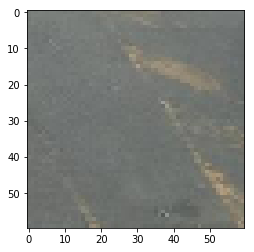

[0.01849169]
0.0


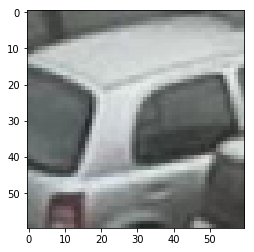

[0.00365034]
1.0


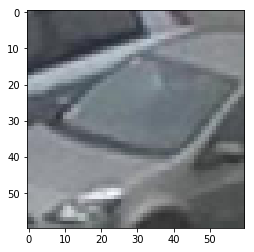

[1.]
1.0


In [16]:
for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()
    print(result[i])
    print(y_batch[i])
